# Unsupervised learning

# Online shoppers intention


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

In [2]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.1f}'.format


shoppers = pd.read_csv("online_shoppers_intention.csv")
shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.7,0.1,0.1,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.5,0.0,0.1,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Obrada podataka

In [3]:
def one_hot_encoding(data):
    categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

    for col in categorical_features:
        one_hot = pd.get_dummies(data[col])
        column_list = []
        for c in one_hot.columns:
            column_list.append(col + '_' + str(c))
        one_hot.columns = column_list
        data = data.drop(col, axis=1)
        data = data.join(one_hot)
    return data

### Podela dataset-a u dva dela

In [4]:
shoppers = one_hot_encoding(shoppers)
positive_shoppers = shoppers[shoppers.Revenue == True]
negative_shoppers = shoppers[shoppers.Revenue == False]
labels_Revenue = shoppers['Revenue']

In [5]:
positive_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
65,3,87.8,0,0.0,27,798.3,0.0,0.0,22.9,0.8,True,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
76,10,1005.7,0,0.0,36,2111.3,0.0,0.0,11.4,0.0,True,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
101,4,61.0,0,0.0,19,607.0,0.0,0.0,17.5,1.0,True,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
188,9,111.5,1,48.5,49,1868.8,0.0,0.0,1.7,0.0,True,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
196,2,56.0,1,144.0,67,2563.8,0.0,0.0,19.3,0.0,True,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [6]:
negative_shoppers.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,False,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.7,0.1,0.1,0.0,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.5,0.0,0.1,0.0,0.0,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Elbow Method

In [7]:
def ElbowMethod(data, title):
    distortion = []
    K = range(1, 10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortion.append(kmeanModel.inertia_)

    plt.plot(K, distortion, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k for ' + title)
    plt.show()

#### Broj klastera za pocetni dataset

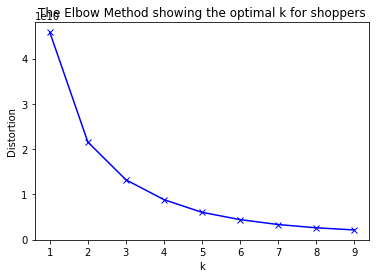

In [8]:
ElbowMethod(shoppers, "shoppers")

#### Broj klastera za pozitivne kupce

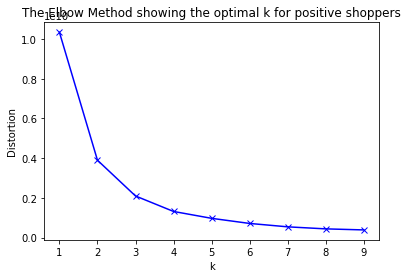

In [9]:
ElbowMethod(positive_shoppers, "positive shoppers")

##### Na osnovu grafika odabrano je da je broj klastera 4

In [10]:
number_of_clusters_positive_shoppers = 4

#### Broj klastera za negativne kupce

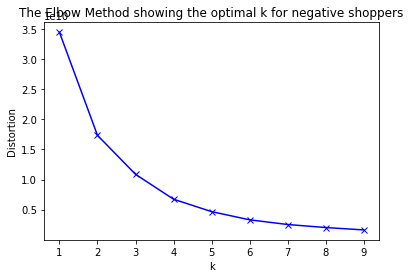

In [11]:
ElbowMethod(negative_shoppers, "negative shoppers")

##### Na osnovu grafika odabrano je da je broj klastera 4

In [12]:
number_of_clusters_negative_shoppers = 4

### Skaliranje podataka

In [13]:
def scaling(df, numerical_index):
    data = df.values.astype(np.float)
    numerical_columns = data[:, :numerical_index]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numerical_columns)
    data[:, :numerical_index] = scaled_features
    return pd.DataFrame(data, index=df.index, columns=df.columns), scaler

### Vizuelni prikaz klastera za K-Means

In [14]:
def drawKMeans(data, cluster, title):
    plt.scatter(data[:, 0], data[:, 1], label='Datapoints')
    plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
    plt.title(title)
    plt.legend()
    plt.show()

    prediction = cluster.predict(data)
    plt.scatter(data[:, 0], data[:, 1], c=prediction)
    plt.title(title)
    plt.show()
    return prediction

### Vizuelni prikaz klastera ostalih algoritama

In [15]:
def draw(data, cluster, title):
    prediction = cluster.fit_predict(data)
    plt.scatter(data[:, 0], data[:, 1], c=prediction)
    plt.title(title)
    plt.show()
    return prediction

## Obrada početnog dataset-a

In [16]:
dataset = shoppers 
title = "Shoppers"
num = 2

### Brisanje atributa koji predstavlja klasu i skaliranje podataka

In [17]:
dataset = dataset.drop('Revenue', axis=1)
dataset, scaler = scaling(dataset, 10)
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.7,-0.5,-0.4,-0.2,-0.7,-0.6,3.7,3.2,-0.3,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.7,-0.5,-0.4,-0.2,-0.7,-0.6,-0.5,1.2,-0.3,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.7,-0.5,-0.4,-0.2,-0.7,-0.6,3.7,3.2,-0.3,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.7,-0.5,-0.4,-0.2,-0.7,-0.6,0.6,2.0,-0.3,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.7,-0.5,-0.4,-0.2,-0.5,-0.3,-0.0,0.1,-0.3,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Primenom PCA redukujemo broj atributa na 2

In [19]:
pca_reducer = PCA(n_components=2)
pca_data = pca_reducer.fit_transform(dataset)

### K-Means

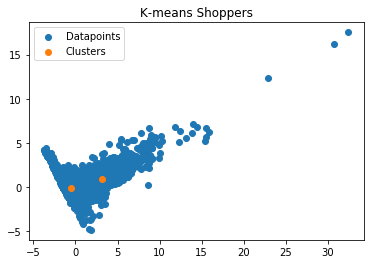

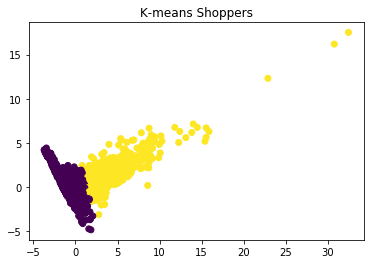

Shoppers K-means homogeneity=0.02074922801681022 v-measure=0.021032472754704042 completeness=0.02132355758319612



In [20]:
kmeans = KMeans(n_clusters=num).fit(pca_data)
kmeans_prediction = drawKMeans(pca_data, kmeans, "K-means " + title)

kmeans_homogen = sklearn.metrics.homogeneity_score(labels_Revenue, kmeans_prediction)
kmeans_vmeasure = sklearn.metrics.v_measure_score(labels_Revenue, kmeans_prediction)
kmeans_completeness = sklearn.metrics.completeness_score(labels_Revenue, kmeans_prediction)
print(title + " K-means homogeneity=" + str(kmeans_homogen) + " v-measure=" + str(kmeans_vmeasure) + " completeness=" + str(kmeans_completeness) + "\n")


### DBSCAN i Hijerarhijski

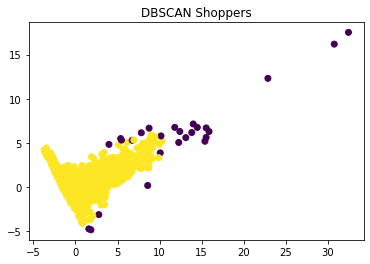

Shoppers DBSCAN homogeneity score = 0.0002097027886026324 v-measure = 0.0004052048952822518 completeness=0.005983698315108602



In [21]:
dbscan = DBSCAN(eps=1, min_samples=10).fit(pca_data)
dbscan_prediction = draw(pca_data, dbscan, "DBSCAN " + title)

dbscan_homogen = sklearn.metrics.homogeneity_score(labels_Revenue, dbscan_prediction)
dbscan_vmeasure = sklearn.metrics.v_measure_score(labels_Revenue, dbscan_prediction)
dbscan_completeness = sklearn.metrics.completeness_score(labels_Revenue, dbscan_prediction)
print(title + " DBSCAN homogeneity score = " + str(dbscan_homogen) + " v-measure = " + str(dbscan_vmeasure) + " completeness=" + str(dbscan_completeness) + "\n")


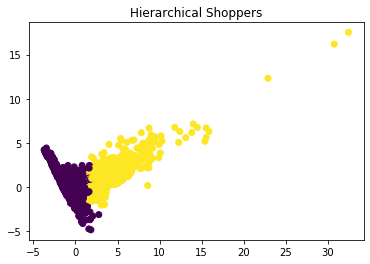

Shoppers Agglomerative homogeneity score = 0.02281571796663103 v-measure = 0.023494290036379064 completeness=0.024214462776420094



In [22]:
hierarchical_agglomerative = AgglomerativeClustering(n_clusters=num).fit(pca_data)
hierar_prediction = draw(pca_data, hierarchical_agglomerative, "Hierarchical " + title)

hierar_homogen = sklearn.metrics.homogeneity_score(labels_Revenue, hierar_prediction)
hierar_vmeasure = sklearn.metrics.v_measure_score(labels_Revenue, hierar_prediction)
hierar_completeness = sklearn.metrics.completeness_score(labels_Revenue, hierar_prediction)
print(title + " Agglomerative homogeneity score = " + str(hierar_homogen) + " v-measure = " + str(hierar_vmeasure) + " completeness=" + str(hierar_completeness) + "\n")

## Obrada pozitivnih kupaca

In [23]:
dataset = positive_shoppers 
title = "Positive shoppers"
num = number_of_clusters_positive_shoppers

#### Brisanje atributa koji predstavlja klasu i skaliranje podataka

In [24]:
dataset = dataset.drop('Revenue', axis=1)
dataset, scaler = scaling(dataset, 10)
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
65,-0.1,-0.2,-0.5,-0.3,-0.4,-0.5,-0.4,-0.4,-0.1,6.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
76,1.8,4.4,-0.5,-0.3,-0.2,0.1,-0.1,-0.3,-0.4,-0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
101,0.2,-0.3,-0.5,-0.3,-0.5,-0.5,-0.4,0.5,-0.3,7.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
188,1.5,-0.0,0.1,-0.1,0.0,-0.0,-0.4,0.1,-0.7,-0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
196,-0.4,-0.3,0.1,0.5,0.3,0.3,-0.4,-0.8,-0.2,-0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Primenom PCA redukujemo broj atributa na 2

In [25]:
pca_reducer = PCA(n_components=2)
pca_data = pca_reducer.fit_transform(dataset)

#### K-Means

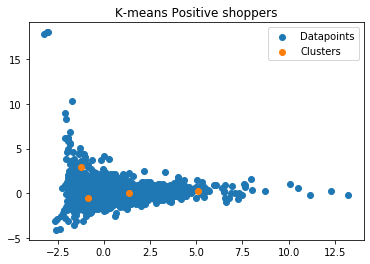

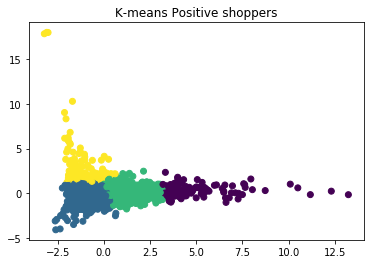

In [26]:
kmeans = KMeans(n_clusters=num).fit(pca_data)
kmeans_prediction = drawKMeans(pca_data, kmeans, "K-means " + title)

#### DBSCAN

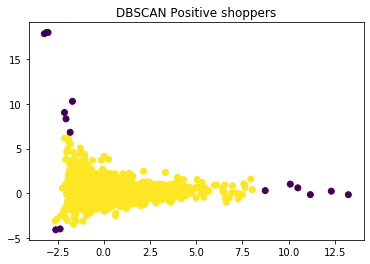

In [27]:
dbscan = DBSCAN(eps=1, min_samples=10).fit(pca_data)
dbscan_prediction = draw(pca_data, dbscan, "DBSCAN " + title)

#### Hijerarhijski

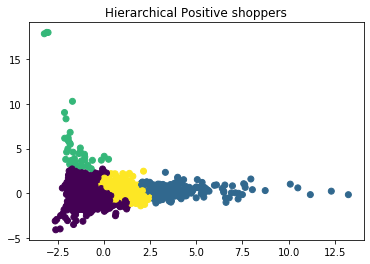

In [28]:
hierarchical_agglomerative = AgglomerativeClustering(n_clusters=num).fit(pca_data)
hierar_prediction = draw(pca_data, hierarchical_agglomerative, "Hierarchical " + title)


## Obrada negativnih kupaca

In [29]:
dataset = negative_shoppers 
title = "Negative shoppers"
num = number_of_clusters_negative_shoppers

#### Brisanje atributa koji predstavlja klasu i skaliranje podataka

In [30]:
dataset = dataset.drop('Revenue', axis=1)
dataset, scaler = scaling(dataset, 10)
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,3.4,3.0,-0.2,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,-0.5,1.0,-0.2,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,3.4,3.0,-0.2,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,0.5,1.8,-0.2,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.7,-0.4,-0.4,-0.2,-0.5,-0.2,-0.1,0.1,-0.2,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Primenom PCA redukujemo broj atributa na 2

In [31]:
pca_reducer = PCA(n_components=2)
pca_data = pca_reducer.fit_transform(dataset)

#### K-Means

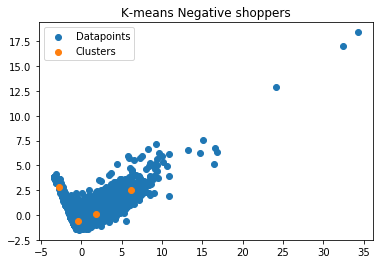

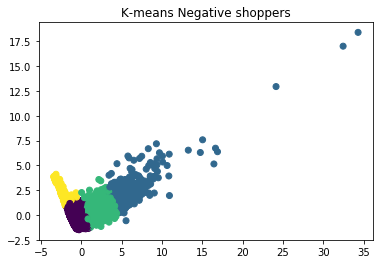

In [32]:
kmeans = KMeans(n_clusters=num).fit(pca_data)
kmeans_prediction = drawKMeans(pca_data, kmeans, "K-means " + title)

#### DBSCAN

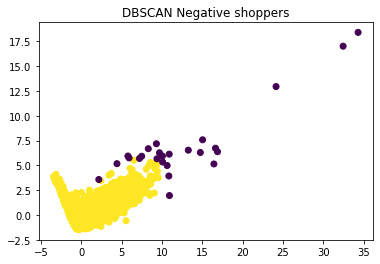

In [33]:
dbscan = DBSCAN(eps=1, min_samples=10).fit(pca_data)
dbscan_prediction = draw(pca_data, dbscan, "DBSCAN " + title)

#### Hijerarhijski

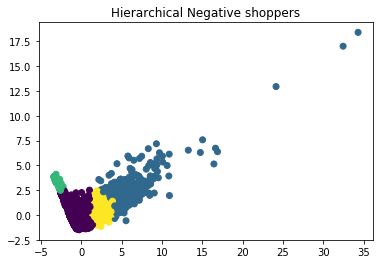

In [34]:
hierarchical_agglomerative = AgglomerativeClustering(n_clusters=num).fit(pca_data)
hierar_prediction = draw(pca_data, hierarchical_agglomerative, "Hierarchical " + title)


## Broj klastera i šumova na osnovu DBSCAN-a


In [35]:
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Number of clusters = %d" % n_clusters_)
print("Number of noises = %d" % n_noise_)

Number of clusters = 1
Number of noises = 25


## Odbacivanje šumova dobijenih iz DBSCAN-a

In [36]:

pca_dataframe = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_dataframe['Clusters'] = dbscan_prediction

negative_shoppers['Clusters'] = dbscan_prediction
original_valid_negative_shoppers = negative_shoppers[negative_shoppers.Clusters == 0]
original_valid_negative_shoppers = original_valid_negative_shoppers.drop('Clusters', axis=1) #originalni podaci o ljudima koji nisu obavili kupovinu, bez sumova

valid_negative_shoppers = pca_dataframe[pca_dataframe.Clusters == 0]
valid_negative_shoppers = valid_negative_shoppers.drop('Clusters', axis=1)

valid_negative_shoppers_num = valid_negative_shoppers.values.astype(np.float)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Elbow metodom određujemo broj klastera

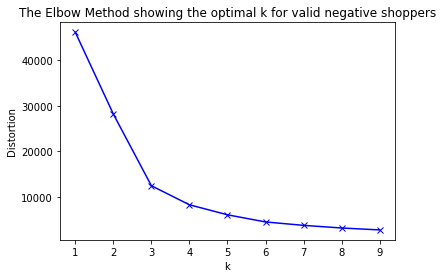

In [37]:
ElbowMethod(valid_negative_shoppers_num, "valid negative shoppers")


#### Na osnovu slike broj klastera je 3

In [38]:
number_of_clusters = 3


## Obrada negativnih kupaca bez šumova

#### K-Means

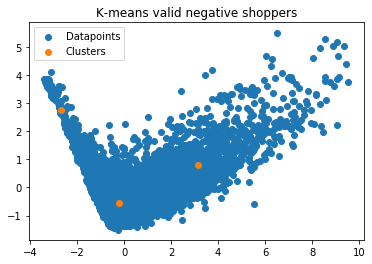

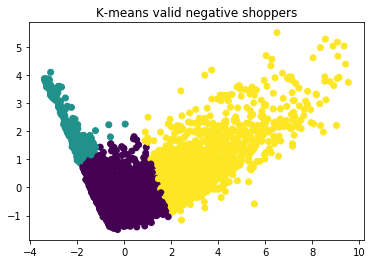

Silhouette K-means: 0.6265944878696178
Calinski-Harabasz index, K-means: 
14013.995306438872
Davies-Bouldin K-means:
0.5644369808589502


In [39]:
kmeans = KMeans(n_clusters=number_of_clusters).fit(valid_negative_shoppers_num)
kmeans_prediction = drawKMeans(valid_negative_shoppers_num, kmeans, "K-means " + "valid negative shoppers")
print("Silhouette K-means: " + str(sklearn.metrics.silhouette_score(valid_negative_shoppers_num, kmeans.labels_, metric='euclidean')))
print("Calinski-Harabasz index, K-means: ")
print(sklearn.metrics.calinski_harabasz_score(valid_negative_shoppers_num, kmeans.labels_))
print("Davies-Bouldin K-means:")
print(sklearn.metrics.davies_bouldin_score(valid_negative_shoppers_num, kmeans.labels_))


#### DBSCAN

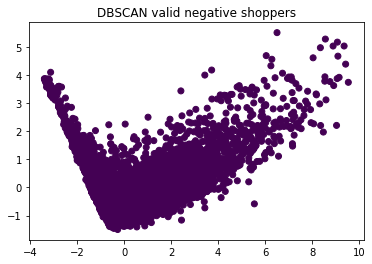

In [40]:
dbscan = DBSCAN(eps=1, min_samples=10).fit(valid_negative_shoppers_num)
dbscan_prediction = draw(valid_negative_shoppers_num, dbscan, "DBSCAN " + "valid negative shoppers")


#### Hijerarhijski

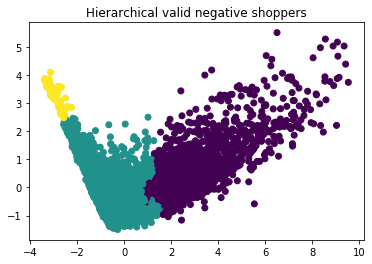

Silhouette Agglomerative: 0.5840715291566346
Calinski-Harabasz index, Agglomerative: 
11673.026095308804
Davies-Bouldin Agglomerative:
0.5659647359250016


In [41]:
hierarchical_agglomerative = AgglomerativeClustering(n_clusters=number_of_clusters).fit(valid_negative_shoppers_num)
prediction_hierarch = draw(valid_negative_shoppers_num, hierarchical_agglomerative, "Hierarchical " + "valid negative shoppers")
print("Silhouette Agglomerative: " + str(sklearn.metrics.silhouette_score(valid_negative_shoppers_num, hierarchical_agglomerative.labels_, metric='euclidean')))
print("Calinski-Harabasz index, Agglomerative: ")
print(sklearn.metrics.calinski_harabasz_score(valid_negative_shoppers_num, hierarchical_agglomerative.labels_))
print("Davies-Bouldin Agglomerative:")
print(sklearn.metrics.davies_bouldin_score(valid_negative_shoppers_num, hierarchical_agglomerative.labels_))

## Dodavanje kolone koja predstavlja ID klastera dobijenog iz K-Means

In [42]:
original_valid_negative_shoppers['KmeansClusters'] = kmeans_prediction
clusters = [None] * number_of_clusters
columns=['Administrative', 'Administrative_Duration', 'Informational',
 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1',
 'OperatingSystems_2', 'OperatingSystems_3' ,'OperatingSystems_4',
 'OperatingSystems_5' ,'OperatingSystems_6', 'OperatingSystems_7',
 'OperatingSystems_8' ,'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4',
 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
 'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
 'TrafficType_13', 'TrafficType_14' ,'TrafficType_15', 'TrafficType_16',
 'TrafficType_17' ,'TrafficType_18', 'TrafficType_19' ,'TrafficType_20',
 'VisitorType_New_Visitor', 'VisitorType_Other',
 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']

#### Pravljenje DataFrame-a za krajnju analizu podataka

In [46]:
analyze = pd.DataFrame()
analyze['name'] = columns

## Popunjavanje DataFrame-a za krajnju analizu

In [47]:
for i in range(number_of_clusters):
    info = []
    clusters[i] = original_valid_negative_shoppers[original_valid_negative_shoppers.KmeansClusters==i]
    number_of_people = len(clusters[i].index)
    f = open(str(i) + "_analyze.txt", 'w')
    f.write(str(clusters[i].describe()))
    for j in range(len(columns)):
        if j < 10:
            info.append("mean: " + str(round(clusters[i][columns[j]].mean(), 2)) + " std: " + str(round(clusters[i][columns[j]].std(), 2)))
            f.write(columns[j] + " mean: " + str(round(clusters[i][columns[j]].mean(), 2)) + " std: " + str(round(clusters[i][columns[j]].std(), 2)) + "\n")
        else:
            num = len(clusters[i][clusters[i][columns[j]] == 1]);
            percent = (num / number_of_people) * 100
            info.append("count: " + str(round(num, 2)) + " percent: " + str(round(percent, 2)))
            f.write(columns[j] + " count: " + str(round(num, 2)) + " percent: " + str(round(percent, 2)) + "\n")
    analyze['info cluster ' + str(i)] = info
    f.close()

f = open("analyze.txt", 'w')
f.write(str(analyze))
f.close()

print(analyze)

                             name              info cluster 0  \
0                  Administrative        mean: 1.55 std: 2.22   
1         Administrative_Duration       mean: 45.74 std: 84.0   
2                   Informational        mean: 0.18 std: 0.56   
3          Informational_Duration        mean: 6.3 std: 28.84   
4                  ProductRelated      mean: 21.62 std: 19.89   
..                            ...                         ...   
70        VisitorType_New_Visitor  count: 1160 percent: 14.64   
71              VisitorType_Other     count: 51 percent: 0.64   
72  VisitorType_Returning_Visitor  count: 6715 percent: 84.72   
73                  Weekend_False  count: 6108 percent: 77.06   
74                   Weekend_True  count: 1818 percent: 22.94   

                info cluster 1              info cluster 2  
0         mean: 0.05 std: 0.28        mean: 6.79 std: 4.42  
1        mean: 1.21 std: 20.34     mean: 275.97 std: 320.5  
2         mean: 0.02 std: 0.17      